# Solving models

When solving models, we tend to use two mathematical tools:

* maximization
* equilibrium

We usually analyze agents maximizing utility, firms maximizing profits and regulators/planners maximizing welfare. Hence, this file gives an introduction to optimization in python. It gives examples and illustrates where you can look for more or terms that you can google to find more information.

When more than one agent/firm/planner interacts, we derive the equilibrium. Equilibrium is a fixed point --in terms of reaction functions-- and hence we also introduce a number of solvers.

There are number of optimization routines and solvers for python. For our course, it is sufficient to work with the optimize library from [scipy](http://docs.scipy.org/doc/scipy/reference/optimize.html). You can use the documentation at this site or google "scipy fsolve" to find examples that you can copy and adapt to your purposes.

If, at some point, you need other solvers/maximizers, you can take a look at [this website](http://www.scipy.org/topical-software.html) for an overview of scientific tools for python.

We first consider numerical model solving. Then we give a short introduction to doing math with symbols in python.

First, we import the relevant libraries. Numpy and scipy are math libraries for python. We import matplotlib to create figures which will be displayed in the notebook because of `%matplotlib inline`.

In [1]:
from scipy import optimize,arange
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

## Numerical solving an I.O. model

We use the following example from industrial organization (I.O.). Firms operating in a market, maximizing profits. We first look at the monopoly problem, where we focus on profit maximization (as equilibrium is no issue here). 

Then we look at the case with two or more firms, where we both maximize profits and find an equilibrium.

In all the examples, we work with a linear demand curve $p(Q)=1-Q$ and costs $c(q)=c_i q$, where $Q$ denotes total output on the market and $q$ the output level of one firm. For a monopolist, we obviously have $q=Q$.


In [2]:
def demand(Q):
    return 1-Q

def cost(q,c):  # c is constant marginal cost
    return c*q


### Monopoly

Monopoly profits are given by $\pi(q) = (1-q)q-cq$. When we solve this analytically, we take the first order condition: $1-2q-c=0$ and hence $q = (1-c)/2$. Hence, for $c=0$, we find $q=0.5$.

Indeed, we can use a solver like `fsolve` to find this outcome. With $c=0$, `fsolve` finds the solution to $1-2q=0$. We use a lambda-function to define this (rather simple) equation:


In [4]:
output = optimize.fsolve(lambda q: 1-2*q, 0)
print output

[ 0.5]


`fsolve` needs a function (here the lambda-function) and an initial guess for the solution (here we start from $q = 0$).

But we can also use maximization directly. Scipy has only minimization routines, hence to maximize profits $\pi(q)$, we need to minimize negative profits $-\pi(q)$. For this we can use a local optimizer like `fmin`.

In [38]:
def minus_profits(q,*args):         # we want to see profits as a function of q when we maximize profits or
    return -(demand(q)*q-cost(q,c)) # minimize minus_profits; hence c is specified as "*args", when calling fmin
                                    # we specify the c in the "args=(c,)"
x0 = 0
c = 0.0
output = optimize.fmin(minus_profits,x0,args=(c,)) # note the comma in "args(c,)"; it needs to be there!
print output

Optimization terminated successfully.
         Current function value: -0.250000
         Iterations: 23
         Function evaluations: 46
[ 0.5]


Hence the optimal output value equals 0.5 (as we found above). Profits at this optimal output level equal 0.25 (that is $-$`minus_profits`$=0.25$).

As an alternative, you can also use a global optimizer like `brute`. It uses the following syntax. It does not require an initial guess but a range in which to look for the optimum, here the range $(0.0,1.0)$. The answer is close enough to 0.5.

In [36]:
c = 0.0
output = optimize.brute(minus_profits,((0.0,1.0),),args=(c,)) 
print output

[ 0.49995888]


### Duopoly

In a duopoly in this set-up, we have firms 1 and 2 producing perfect substitutes. Output level of firm $i$ is denoted $q_i$. Firm $i$'s profit is written as $\pi(q_i,q_j)=(1-q_i-q_j)q_i-c_i q_i$ for $j \neq i$. The way we usually solve this analytically is as follows.

The two first order conditions for firms 1 and 2 can be written as:

$$
1-2q_1-q_2-c_1 = 0
$$

and

$$
1-2q_2-q_1-c_2 = 0
$$

Then we can solve these two equations in the unknowns $q_1,q_2$. However, we usually take a step in between and define the reaction functions. That is, we solve the optimal $q_i$ as a function of $q_j$:

$$
q_i = \frac{1}{2}(1-c_i-q_j)
$$

Or defining $i$'s reaction function as 

$$
R_i(q_j) = \frac{1}{2}(1-c_i-q_j)
$$

We have an equilibrium if $q_1 = R_1(q_2)$ and $q_2 = R_2(q_1)$. We can plot the reaction functions to give the following well-known figure.



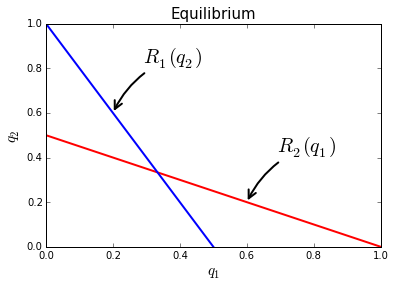

In [32]:
def reaction_function(q_other,c):
    return 0.5*(1-c-q_other)

c_1 = 0.0
c_2 = 0.0

range_q = arange(0.0,1.01,0.01)
range_reaction_1 = [reaction_function(q_2,c_1) for q_2 in range_q]
range_reaction_2 = [reaction_function(q_1,c_2) for q_1 in range_q]

plt.clf()
plt.plot(range_q, range_reaction_2,'-', color = 'r', linewidth = 2)
plt.plot(range_reaction_1, range_q,'-', color = 'b', linewidth = 2)
plt.title("Equilibrium",fontsize = 15)
plt.xlabel("$q_1$",fontsize = 15)
plt.ylabel("$q_2$",fontsize = 15,rotation = 90)
plt.annotate('$R_2(q_1)$', xy=(0.6,reaction_function(0.6,c_2)),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$R_1(q_2)$', xy=(reaction_function(0.6,c_1),0.6),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )




# plt.xlim(c,1.0)
# plt.ylim(0.0,0.3)
plt.savefig('cournot_equilibrium.png')

The equilibrium is given by $q_1,q_2$ such that

$$
\begin{pmatrix} q_1\\ q_2\end{pmatrix} = \begin{pmatrix} R_1(q_2)\\ R_2(q_1)\end{pmatrix}
$$

If both have the same costs, the symmetric equilibrium is given by $q=R(q)$.


Instead of using the first order condition for $q_i$, we can directly find the optimum using `fmin` as we did above.

Let's redo the figure with the reaction functions, now using `fmin`. Note that instead of using `*args`, we use a lambda function here. Both approaches are fine, use the one you like best.

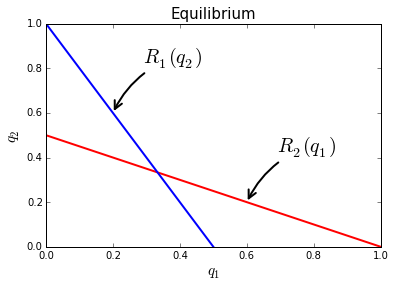

In [46]:
def minus_duopoly_profits(q,q_other,c):
    return -(demand(q+q_other)*q-cost(q,c)) 


def new_reaction_function(q_other,c):
    x0 = 0
    output = optimize.fmin(lambda q: minus_duopoly_profits(q,q_other,c),x0,disp = False) # disp = False reduces 
    return output[0]                                                                     # the output of the routine
                                                                                         # disp = True shows the difference
c_1 = 0.0
c_2 = 0.0

range_q = arange(0.0,1.01,0.01)
range_reaction_1 = [new_reaction_function(q_2,c_1) for q_2 in range_q]
range_reaction_2 = [new_reaction_function(q_1,c_2) for q_1 in range_q]

plt.clf()
plt.plot(range_q, range_reaction_2,'-', color = 'r', linewidth = 2)
plt.plot(range_reaction_1, range_q,'-', color = 'b', linewidth = 2)
plt.title("Equilibrium",fontsize = 15)
plt.xlabel("$q_1$",fontsize = 15)
plt.ylabel("$q_2$",fontsize = 15,rotation = 90)
plt.annotate('$R_2(q_1)$', xy=(0.6,reaction_function(0.6,c_2)),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )
plt.annotate('$R_1(q_2)$', xy=(reaction_function(0.6,c_1),0.6),  xycoords='data', # here we define the labels and arrows in the graph
              xytext=(30, 50), textcoords='offset points', size = 20,
              arrowprops=dict(arrowstyle="->", linewidth = 2,
                              connectionstyle="arc3,rad=.2"),
              )




# plt.xlim(c,1.0)
# plt.ylim(0.0,0.3)
plt.savefig('cournot_equilibrium2.png')

To calculate the equilibrium, we need to find a so called fixed point of the vector function $R(q)$. This can be seen as follows.

Define the function (or mapping) $q \rightarrow R(q)$ with $q \in \Re^2$ and 

$$
R(q) = \begin{pmatrix} R_1(q_2)\\ R_2(q_1)\end{pmatrix}
$$

A fixed point of this function is defined as a vector $q$ such that $q=R(q)$. In words, $q_1$ is the optimal reaction to $q_2$ and $q_2$ is the optimal reaction to $q_1$. That is, the vector $q$ is a Nash equilibrium. Each firm $i$ chooses its optimal output level $q_i$, given the choice by the other firm $q_j$.


In [69]:
def vector_reaction_function(q,c): # q is a vector (or list in python) here
    x0 = 0
    output_1 = optimize.fmin(lambda q1: minus_duopoly_profits(q1,q[1],c[0]),x0,disp = False)
    output_2 = optimize.fmin(lambda q2: minus_duopoly_profits(q2,q[0],c[1]),x0,disp = False)
    return [output_1[0],output_2[0]]   

In [72]:
c = [0.0,0.0]
optimize.fsolve(lambda q: q-vector_reaction_function(q,c), [0,0])


array([ 0.3333125,  0.3333125])

### $n$ firms


Now we want to write the functions in such a way that we can calculate the equilibrium for $n$ firms in the market.

In [86]:
def n_reaction_function(q,c): # q is a vector (or list in python) here
    n = len(q) # number of firms
    firms = range(n) # create a list with n firm identities (0,1,...,n-1)
    x0 = 0 # initial guess for a firm's optimal output level --given what the others do
    total_output = sum(q)
    output = [] # we create an empty list of optimal reactions `output`, and add the optimal reaction of each firm to it
    for firm in firms: # we use the duopoly profits with q_other = \sum_{j \neq i} q_j = \sum_{j} q_j - q_i
        output.append(optimize.fmin(lambda x: minus_duopoly_profits(x,total_output-q[firm],c[firm]),x0,disp = False)[0])
    return output

In [87]:
c = [0.0,0.0,0.0,0.0] # consider the case with 4 firms in the market each with c = 0
optimize.fsolve(lambda q: q-n_reaction_function(q,c), [0,0,0,0])


array([ 0.2,  0.2,  0.2,  0.2])

Cournot-Nash equilibrium with 4 firms with zero marginal costs is that each firm produces $q=1/5$.

## Symbolic math

There are a number of python libraries for symbolic math. We use the standard one, called  [sympy](http://www.sympy.org). Developments here are going fast, but it seems fair to say that python is not yet up to the Mathematica level. With python you do lose some of the broadness and power of Mathematica. However, in my experience --and I have used both-- for most applications this is more than compensated by the fact that python is by far the better programming language.

In [1]:
import sympy

With `init_session` we get "nice looking" output.

In [2]:
from sympy import init_session
init_session() 

IPython console for SymPy 0.7.6.1 (Python 2.7.11-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://www.sympy.org


//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This is what we mean by "nice looking":

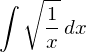

In [3]:
Integral(sqrt(1/x),x)

We can define a function. Note the statements that were implicitly evaluated by `init_session` above; these defined `f` and `x` as being "special" for python. For details on this, see the [gotchas](http://docs.sympy.org/latest/tutorial/gotchas.html). 

In [5]:
f = x**2

With this function $f$ we can do calculus:

In [6]:
diff(f,x)

In [7]:
diff(f,x,x)

In [8]:
integrate(f,x)

Finally, let's solve the duopoly model above.

In [10]:
q1, q2, c1, c2 = symbols('q1 q2 c1 c2')

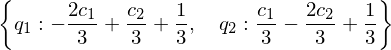

In [11]:
solve([1-2*q1-q2-c1,1-2*q2-q1-c2], q1, q2)